# Importing libraries 

In [3]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Visualizes all the columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, append=True)
#from sklearn.utils.testing import ignore_warnings
#from sklearn.exceptions import ConvergenceWarning

# Examine Data 

When downloading the data, I chose not to include uncertanties, as they aren't very relevant to the actual values of the data and may have negative affects on the model. 

In [4]:
data = pd.read_csv("kepler_objects_interest.csv")
print(data.shape)
data.head()

(9564, 83)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.5

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2673 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

In [6]:
# Rename columns to English names
data = data.rename(columns = {
"kepid":"KepID",
"kepoi_name":"KOIName",
"kepler_name":"KeplerName",
"koi_disposition":"ExoplanetArchiveDisposition",
"koi_vet_stat":"VettingStatus",
"koi_vet_date":"DateofLastParameterUpdate",
"koi_pdisposition":"DispositionUsingKeplerData",
"koi_score":"DispositionScore",
"koi_fpflag_nt":"NotTransitLikeFalsePositiveFlag",
"koi_fpflag_ss":"StellarEclipseFalsePositiveFlag",
"koi_fpflag_co":"CentroidOffsetFalsePositiveFlag",
"koi_fpflag_ec":"EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"koi_disp_prov":"DispositionProvenance",
"koi_comment":"Comment",
"koi_period":"OrbitalPeriod",
"koi_time0bk":"TransitEpochBKJD",
"koi_time0":"TransitEpochBJD",
"koi_eccen":"Eccentricity",
"koi_longp":"Long.ofPeriastron",
"koi_impact":"ImpactParameter",
"koi_duration":"TransitDuration",
"koi_ingress":"IngressDuration",
"koi_depth":"TransitDepth",
"koi_ror":"Planet-StarRadiusRatio",
"koi_srho":"FittedStellarDensity",
"koi_fittype":"PlanetaryFitType",
"koi_prad":"PlanetaryRadius",
"koi_sma":"OrbitSemi-MajorAxis",
"koi_incl":"Inclination",
"koi_teq":"EquilibriumTemperature",
"koi_insol":"InsolationFlux",
"koi_dor":"Planet-StarDistanceoverStarRadius",
"koi_limbdark_mod":"LimbDarkeningModel",
"koi_ldm_coeff4":"LimbDarkeningCoeff.4",
"koi_ldm_coeff3":"LimbDarkeningCoeff.3",
"koi_ldm_coeff2":"LimbDarkeningCoeff.2",
"koi_ldm_coeff1":"LimbDarkeningCoeff.1",
"koi_parm_prov":"ParametersProvenance",
"koi_max_sngle_ev":"MaximumSingleEventStatistic",
"koi_max_mult_ev":"MaximumMultipleEventStatistic",
"koi_model_snr":"TransitSignal-to-Noise",
"koi_count":"NumberofPlanets",
"koi_num_transits":"NumberofTransits",
"koi_tce_plnt_num":"TCEPlanetNumber",
"koi_tce_delivname":"TCEDelivery",
"koi_quarters":"Quarters",
"koi_bin_oedp_sig":"Odd-EvenDepthComparisionStatistic",
"koi_trans_mod":"TransitModel",
"koi_model_dof":"DegreesofFreedom",
"koi_model_chisq":"Chi-Square",
"koi_datalink_dvr":"LinktoDVReport",
"koi_datalink_dvs":"LinktoDVSummary",
"koi_steff":"StellarEffectiveTemperature",
"koi_slogg":"StellarSurfaceGravity",
"koi_smet":"StellarMetallicity",
"koi_srad":"StellarRadius",
"koi_smass":"StellarMass",
"koi_sage":"StellarAge",
"koi_sparprov":"StellarParameterProvenance",
"ra":"RA",
"dec":"Dec",
"koi_kepmag":"Kepler-band",
"koi_gmag":"g'-band",
"koi_rmag":"r'-band",
"koi_imag":"i'-band",
"koi_zmag":"z'-band",
"koi_jmag":"J-band",
"koi_hmag":"H-band",
"koi_kmag":"K-band",
"koi_fwm_stat_sig":"FWOffsetSignificance",
"koi_fwm_sra":"FWSourceAlpha",
"koi_fwm_sdec":"FWSourceDelta",
"koi_fwm_srao":"FWSourceAlphaDiff",
"koi_fwm_sdeco":"FWSourceDeltaDiff",
"koi_fwm_prao":"FWAlphaDiff",
"koi_fwm_pdeco":"FWDeltaDiff",
"koi_dicco_mra":"PRFAlphaSQDiff",
"koi_dicco_mdec":"PRFDeltaSQDiff",
"koi_dicco_msky":"PRFThetaSQDiffarcsec",
"koi_dikco_mra":"PRFAlphaSQDiffKIC",
"koi_dikco_mdec":"PRFDeltaSQDiffKIC",
"koi_dikco_msky":"PRFThetaSQDiffKIC"
})

In [7]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransitLikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,DispositionProvenance,Comment,OrbitalPeriod,TransitEpochBKJD,TransitEpochBJD,Eccentricity,Long.ofPeriastron,ImpactParameter,TransitDuration,IngressDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryFitType,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningModel,LimbDarkeningCoeff.4,LimbDarkeningCoeff.3,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,ParametersProvenance,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,TCEDelivery,Quarters,Odd-EvenDepthComparisionStatistic,TransitModel,DegreesofFreedom,Chi-Square,LinktoDVReport,LinktoDVSummary,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,StellarAge,StellarParameterProvenance,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS

# Functions for each model

## Runner functions

In [8]:
# gets features
def get_features(data):
    features = data.drop(columns = ["ExoplanetCandidate", "ExoplanetConfirmed"])
    return features

In [9]:
# gets targets
def get_targets(data):
    targets = data["ExoplanetCandidate"]
    return targets

In [10]:
def evaluation(y_test, y_pred, model):
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('Confusion Matrix:')
    sns.set(font_scale = 2)
    cm = confusion_matrix(y_test, y_pred, labels = None)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
    disp.plot()
    plt.grid(False)
    plt.show()

In [11]:
# given a model, tests it
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    evaluation(y_test, predictions, model)
    
    print("\n")

## Runner Functions for Basic Models

In [12]:
# tests all the regressions
def test_models(features, targets, tst_size):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    log_reg(X_train, X_test, y_train, y_test)
    knn(X_train, X_test, y_train, y_test)
    d_tree(X_train, X_test, y_train, y_test)
    rand_forest(X_train, X_test, y_train, y_test)

In [13]:
# logistic regression
def log_reg(X_train, X_test, y_train, y_test):
    print("Logistic Regression:")
    
    # chance c, class_weight, etc?
    model = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    run_model(model, X_train, X_test, y_train, y_test)

In [14]:
# k nearest neighbors
def knn(X_train, X_test, y_train, y_test):
    print("K nearest neighbors:")
    
    # change leaf_size, metric??
    model = KNeighborsClassifier(leaf_size = 8, metric = "manhattan")
    run_model(model, X_train, X_test, y_train, y_test)

In [15]:
# decision tree
def d_tree(X_train, X_test, y_train, y_test):
    print("Decision tree:")
    
    model = DecisionTreeClassifier()
    run_model(model, X_train, X_test, y_train, y_test)

In [16]:
# random forest
def rand_forest(X_train, X_test, y_train, y_test):
    print("Random forest:")
    
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    run_model(model, X_train, X_test, y_train, y_test)

## Random Forest Importance Chart

In [19]:
# random forest
def rand_forest_important(X_train, X_test, y_train, y_test, font_size, numfeatures):
    print("Random forest:")
    
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    run_model(model, X_train, X_test, y_train, y_test)
    
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    
    num_features = numfeatures 
    plt.title('Feature Importances')
    
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize = font_size)
    plt.xlabel('Relative Importance')
    plt.savefig('temp.png', dpi = 1200)

## Recursive Feature Elimination

In [20]:
# tests all the regressions
def test_models_RFE(features, targets, tst_size, n_features):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    log_reg_RFE(X_train, X_test, y_train, y_test, n_features)
    d_tree_RFE(X_train, X_test, y_train, y_test, n_features)
    rand_forest_RFE(X_train, X_test, y_train, y_test, n_features)

In [21]:
def log_reg_RFE(X_train, X_test, y_train, y_test, n_features):
    print("Logistic Regression:")
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = n_features)
    model = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    run_model(model, X_train, X_test, y_train, y_test) 

In [22]:
def d_tree_RFE(X_train, X_test, y_train, y_test, n_features):
    print("Decision Tree:")
    rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = n_features)
    model = DecisionTreeClassifier()
    pipeline = Pipeline(steps = [("s", rfe), ("m", model)])
    run_model(pipeline, X_train, X_test, y_train, y_test)

In [23]:
# RFE eliminator
def rand_forest_RFE(X_train, X_test, y_train, y_test, n_features):
    print("Random Forest:")
    rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = n_features)
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    pipeline = Pipeline(steps = [("s", rfe), ("m", model)])
    run_model(pipeline, X_train, X_test, y_train, y_test)

## Recursive Feature Elimination with Cross Validation

In [24]:
# tests all the regressions
def test_models_RFECV(features, targets, tst_size):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    rand_forest_RFECV(X_train, X_test, y_train, y_test)

In [27]:
def rand_forest_RFECV(X_train, X_test, y_train, y_test):
    print("Random Forest:")
    
    min_features = 1
    
    model = RFECV(
        estimator = RandomForestClassifier(), 
        step = 1, 
        cv = StratifiedKFold(6), 
        scoring = "accuracy", 
        min_features_to_select = min_features,
        n_jobs = 2
    )
    
    model.fit(X_train, y_train)
    print(f"Optimal number of features: {model.n_features_}")

    n_scores = len(model.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test accuracy")
    plt.errorbar(
        range(min_features, n_scores + min_features),
        model.cv_results_["mean_test_score"],
        yerr=model.cv_results_["std_test_score"],
    )
    plt.title("Recursive Feature Elimination \nwith cross validation")
    plt.show()
    
    predictions = model.predict(X_test)
    evaluation(y_test, predictions, model)

# Preprocessing Data

## Converting data into float

In [28]:
data["ExoplanetCandidate"] = data["DispositionUsingKeplerData"].apply(lambda x : 1 if x == "CANDIDATE" else 0)

In [29]:
data["ExoplanetConfirmed"] = data["ExoplanetArchiveDisposition"].apply(lambda x : 2 if x == "CONFIRMED" else 1 if x == "CANDIDATE" else 0)

Since Quarters represents how much we observed the candidate, we can change that to a number representing how many 1s are in the string. 

In [30]:
def countOne(str):
    count = 0
    for c in str:
        if c == '1':
            count = count + 1
    return count

data["QuartersObserved"] = data["Quarters"].apply(lambda x : countOne(str(x)))

In [32]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransitLikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,DispositionProvenance,Comment,OrbitalPeriod,TransitEpochBKJD,TransitEpochBJD,Eccentricity,Long.ofPeriastron,ImpactParameter,TransitDuration,IngressDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryFitType,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningModel,LimbDarkeningCoeff.4,LimbDarkeningCoeff.3,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,ParametersProvenance,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,TCEDelivery,Quarters,Odd-EvenDepthComparisionStatistic,TransitModel,DegreesofFreedom,Chi-Square,LinktoDVReport,LinktoDVSummary,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,StellarAge,StellarParameterProvenance,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed,QuartersObserved,PlanetaryFit
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2,17,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2,17,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1,14,2
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEE

<AxesSubplot:>

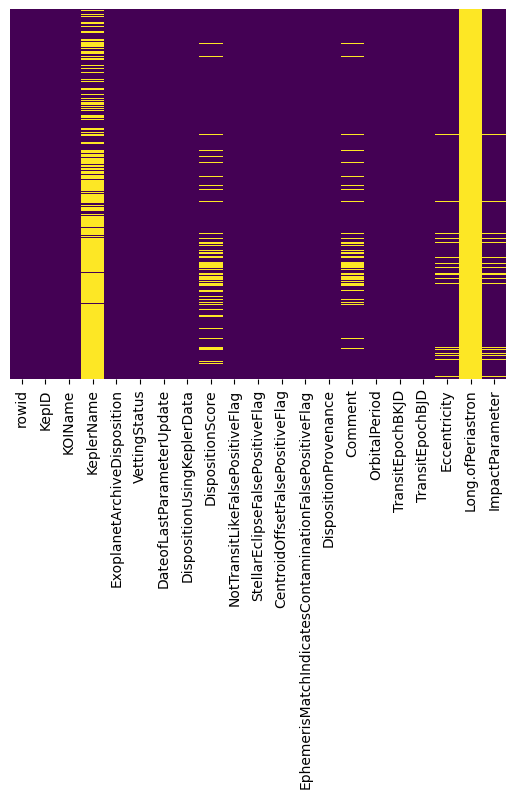

In [33]:
# see what we're missing
sns.heatmap(data.iloc[:, :21].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

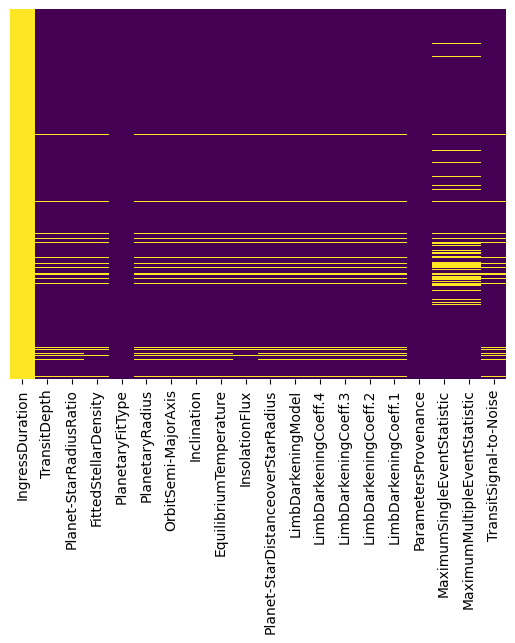

In [34]:
# see what we're missing
sns.heatmap(data.iloc[:, 22:42].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

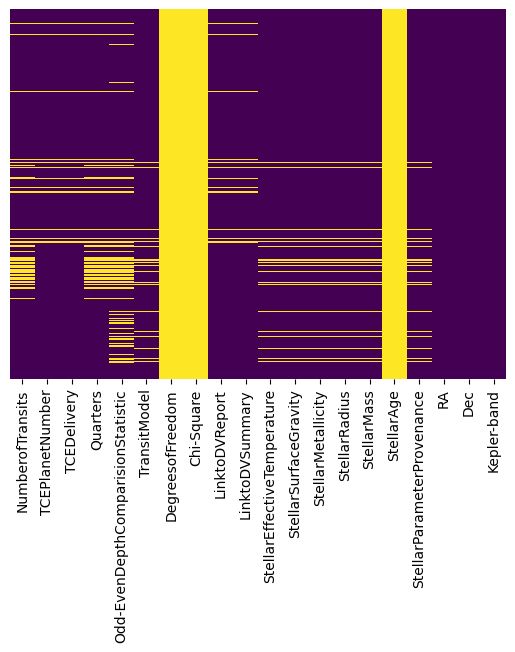

In [35]:
# see what we're missing
sns.heatmap(data.iloc[:, 43:63].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

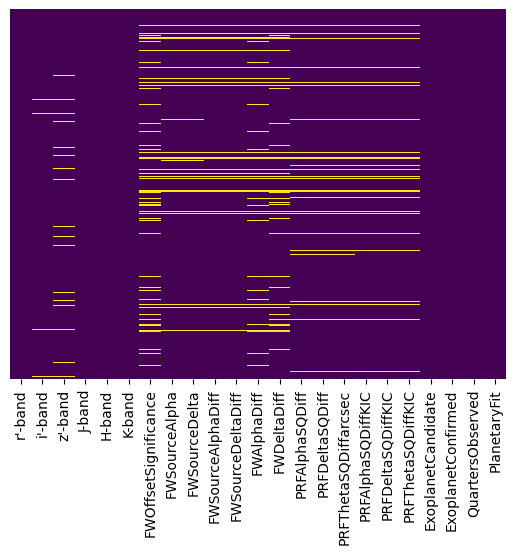

In [36]:
# see what we're missing
sns.heatmap(data.iloc[:, 64:].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
# Everything dropped is either something that's useless, all null/all 0, or bad for model
data.drop(columns = [
"rowid",
"KeplerName",
"KOIName",
"KepID",
"ExoplanetArchiveDisposition",
"VettingStatus",
"DateofLastParameterUpdate",
"DispositionUsingKeplerData",
"DispositionScore",
"NotTransitLikeFalsePositiveFlag",
"StellarEclipseFalsePositiveFlag",
"CentroidOffsetFalsePositiveFlag",
"EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"DispositionProvenance",
"Comment",
"TransitEpochBKJD",
"TransitEpochBJD",
"Eccentricity",
"Long.ofPeriastron",
"IngressDuration",
"PlanetaryFitType",
"LimbDarkeningModel",
"LimbDarkeningCoeff.4",
"LimbDarkeningCoeff.3",
"ParametersProvenance",
"TCEDelivery",
"Quarters",
"TransitModel",
"DegreesofFreedom",
"Chi-Square",
"LinktoDVReport",
"LinktoDVSummary",
"StellarAge",
"StellarParameterProvenance",
"RA", 
"Dec"
], inplace = True)
# dropping RA and Dec since loc of planet in sky is irrelevant

In [38]:
data.head()

,OrbitalPeriod,ImpactParameter,TransitDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,Odd-EvenDepthComparisionStatistic,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed,QuartersObserved,PlanetaryFit
0,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,1.0,0.6864,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2,17,2
1,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,2.0,0.0023,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2,17,2
2,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,638.0,39.30,53.500,0.2711,0.3858,37.159767,187.449100,76.3,1,56.0,1.0,0.6624,5853.0,4.544,-0.18,0.868,0.961,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1,14,2
3,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,1.0,0.0000,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,0,14,2
4,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,1.0,0.3090,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,1,2,16,2


In [39]:
data.shape

(9564, 51)

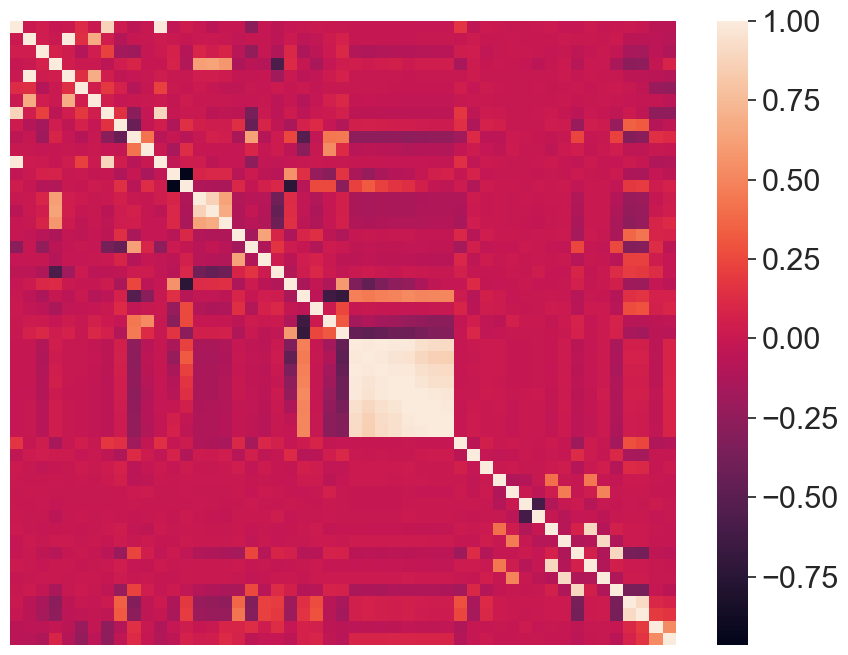

In [40]:
sns.set(font_scale = 2)
svm = sns.heatmap(data.corr(), xticklabels = False, yticklabels = False)
figure = svm.get_figure()
figure.subplots_adjust(left=-.3, bottom=-.3, right=1, top=1, wspace=10, hspace=10)
sns.set(font_scale = 1)

# Testing Models

### Basic Models

In [41]:
# removes all rows with a null value
data_no_null = data.dropna()
data_no_null.shape

(6682, 51)

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.9120838009726898
Recall: 0.9432197728790915
F1 Score: 0.923177508989866
Precision: 0.9039692701664532
Confusion Matrix:


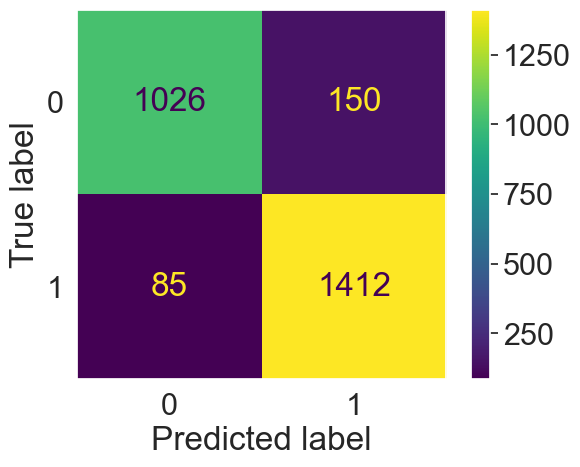



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8013468013468014
Recall: 0.8911155644622578
F1 Score: 0.8340106283213504
Precision: 0.7837837837837838
Confusion Matrix:


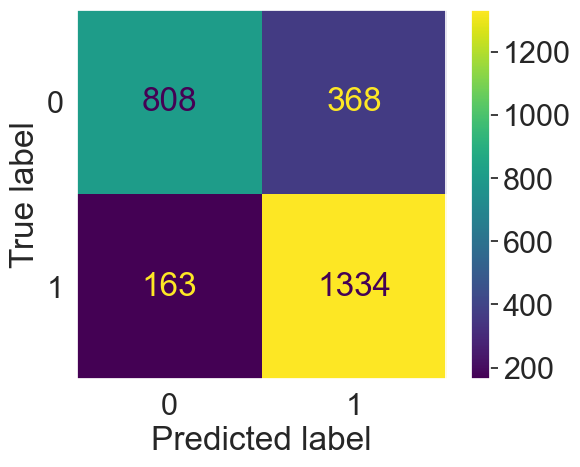



Decision tree:
Evaluation Metrics:
Accuracy: 0.8978675645342312
Recall: 0.916499665998664
F1 Score: 0.9095127610208816
Precision: 0.9026315789473685
Confusion Matrix:


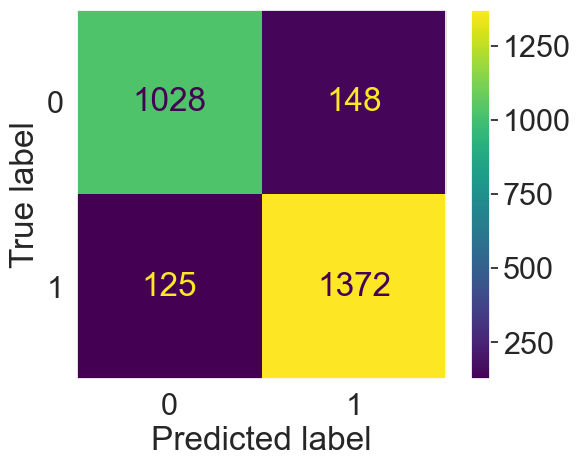



Random forest:
Evaluation Metrics:
Accuracy: 0.936026936026936
Recall: 0.9492317969271877
F1 Score: 0.9432459342847661
Precision: 0.9373350923482849
Confusion Matrix:


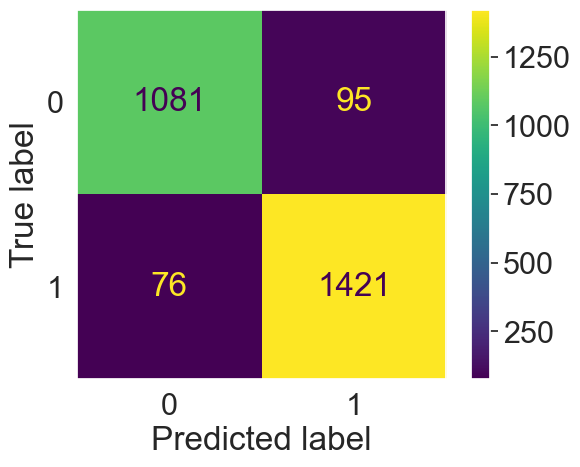

In [42]:
features = get_features(data_no_null)
targets = get_targets(data_no_null)

# test_models prints out data for our 5 models
test_models(features, targets, 0.4)

## Imputation

In [43]:
data.shape

(9564, 51)

In [44]:
print(data.isnull().values.sum())

20801


<AxesSubplot:>

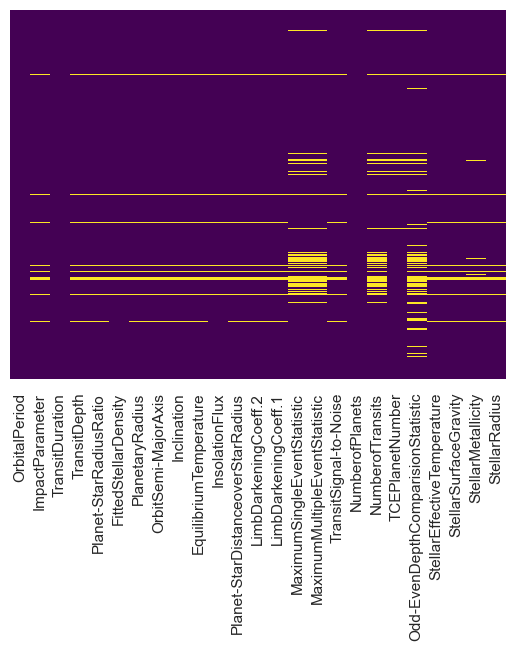

In [45]:
# check what stuff is missing again
sns.set(font_scale = 1)
sns.heatmap(data.iloc[:, :25].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

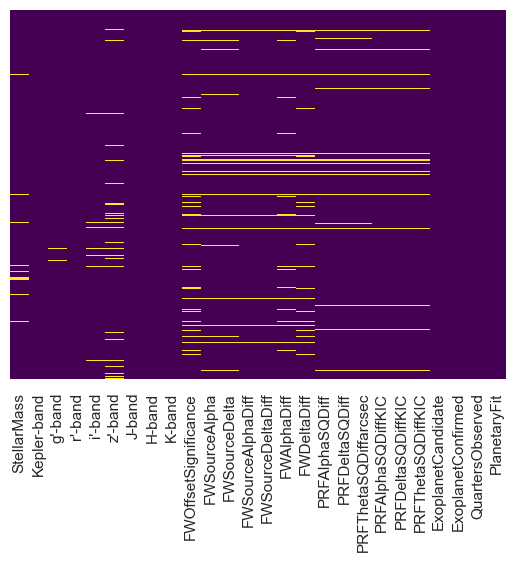

In [46]:
sns.heatmap(data.iloc[:, 25:].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

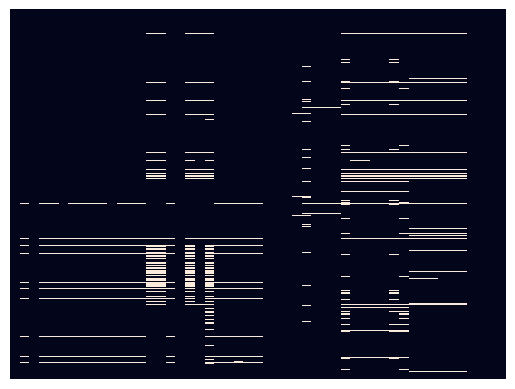

In [47]:
sns.heatmap(data.isnull(), xticklabels = False, yticklabels = False, cbar = False)

### Imputation function

In [48]:
def impute(imputer, data):
    imputer.fit(data)
    np_data_imp = imputer.transform(data)

    data_imp = pd.DataFrame(np_data_imp, columns = [
        "OrbitalPeriod",
        "ImpactParameter",
        "TransitDuration",
        "TransitDepth",
        "Planet-StarRadiusRatio",
        "FittedStellarDensity",
        "PlanetaryRadius",
        "OrbitSemi-MajorAxis",
        "Inclination",
        "EquilibriumTemperature",
        "InsolationFlux",
        "Planet-StarDistanceoverStarRadius",
        "LimbDarkeningCoeff.2",
        "LimbDarkeningCoeff.1",
        "MaximumSingleEventStatistic",
        "MaximumMultipleEventStatistic",
        "TransitSignal-to-Noise",
        "NumberofPlanets",
        "NumberofTransits",
        "TCEPlanetNumber",
        "Odd-EvenDepthComparisionStatistic",
        "StellarEffectiveTemperature",
        "StellarSurfaceGravity",
        "StellarMetallicity",
        "StellarRadius",
        "StellarMass",
        "Kepler-band",
        "g'-band",
        "r'-band",
        "i'-band",
        "z'-band",
        "J-band",
        "H-band",
        "K-band",
        "FWOffsetSignificance",
        "FWSourceAlpha",
        "FWSourceDelta",
        "FWSourceAlphaDiff",
        "FWSourceDeltaDiff",
        "FWAlphaDiff",
        "FWDeltaDiff",
        "PRFAlphaSQDiff",
        "PRFDeltaSQDiff",
        "PRFThetaSQDiffarcsec",
        "PRFAlphaSQDiffKIC",
        "PRFDeltaSQDiffKIC",
        "PRFThetaSQDiffKIC",
        "ExoplanetCandidate",
        "ExoplanetConfirmed",
        "QuartersObserved",
        "PlanetaryFit"
    ])

    features_imp = get_features(data_imp)
    targets_imp = get_targets(data_imp)
    test_models(features_imp, targets_imp, 0.4)

### Mean Imputation

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.8110297961317303
Recall: 0.8755144032921811
F1 Score: 0.8248122122607221
Precision: 0.7796610169491526
Confusion Matrix:


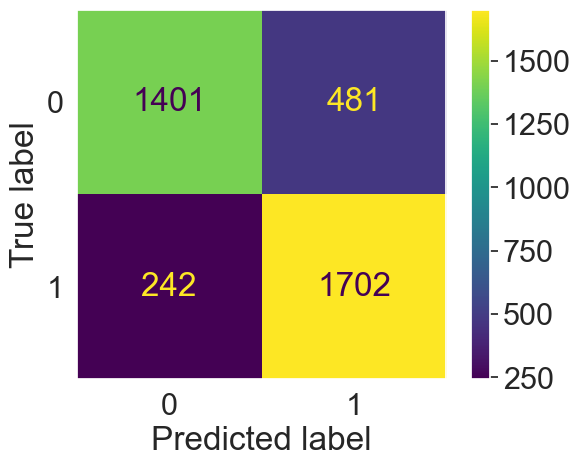



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.7650287506534239
Recall: 0.8168724279835391
F1 Score: 0.7793865030674847
Precision: 0.7451900516189582
Confusion Matrix:


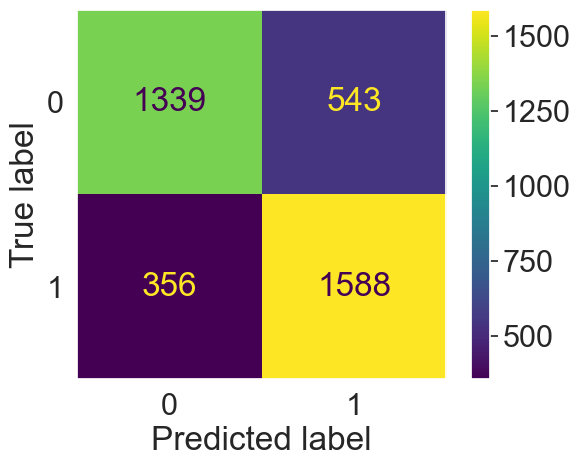



Decision tree:
Evaluation Metrics:
Accuracy: 0.8562467328802927
Recall: 0.8487654320987654
F1 Score: 0.8571428571428572
Precision: 0.8656873032528857
Confusion Matrix:


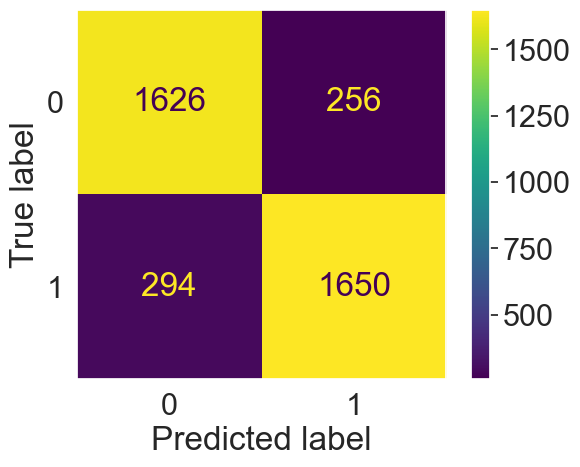



Random forest:
Evaluation Metrics:
Accuracy: 0.8972817564035547
Recall: 0.8713991769547325
F1 Score: 0.8960592435863528
Precision: 0.9221556886227545
Confusion Matrix:


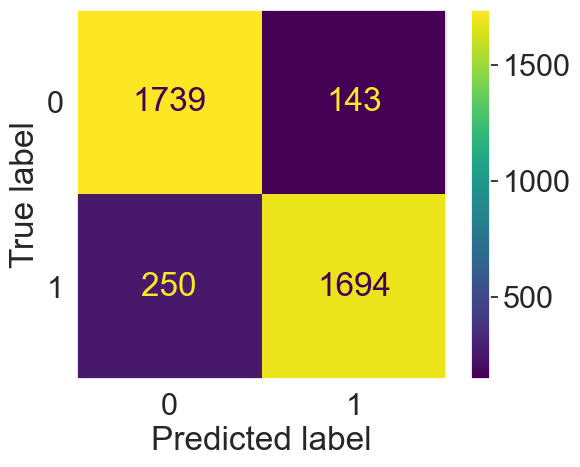

In [49]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute(imp_mean, data)

### Median Impuatation

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.8170412963930999
Recall: 0.8518518518518519
F1 Score: 0.8255234297108673
Precision: 0.8007736943907157
Confusion Matrix:


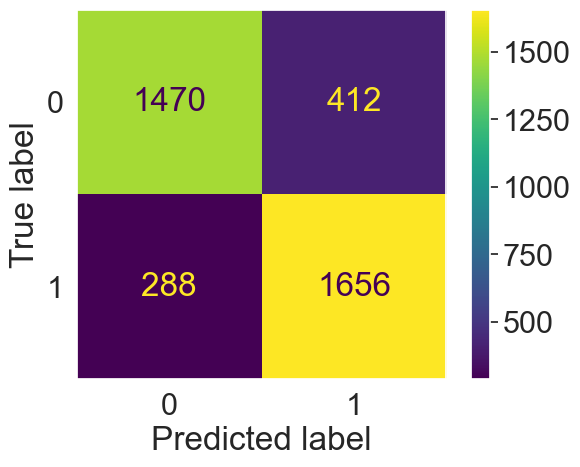



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.7618923157344485
Recall: 0.815843621399177
F1 Score: 0.7768797452853293
Precision: 0.7414679756895746
Confusion Matrix:


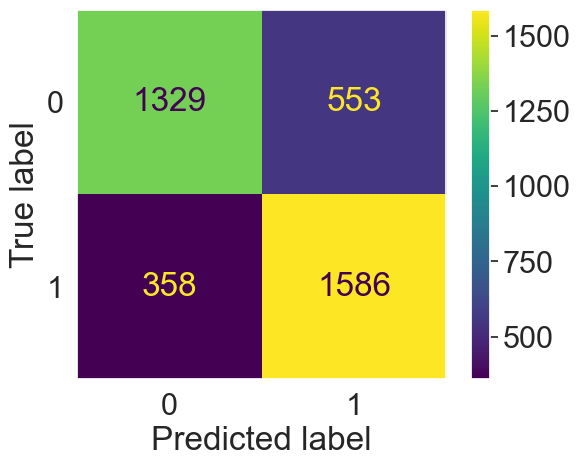



Decision tree:
Evaluation Metrics:
Accuracy: 0.8463146889702039
Recall: 0.8395061728395061
F1 Score: 0.8473520249221184
Precision: 0.8553459119496856
Confusion Matrix:


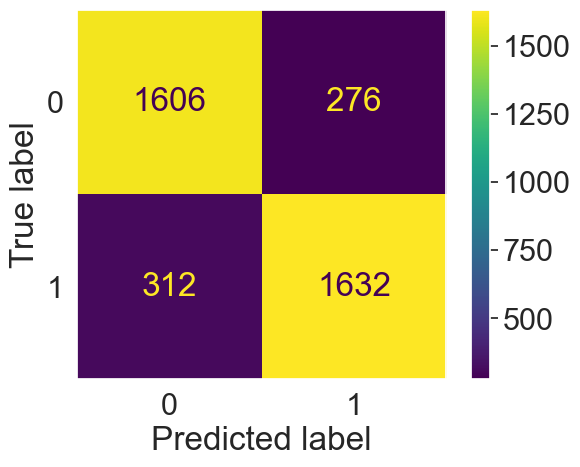



Random forest:
Evaluation Metrics:
Accuracy: 0.8991113434396236
Recall: 0.8770576131687243
F1 Score: 0.8983140147523709
Precision: 0.9206263498920086
Confusion Matrix:


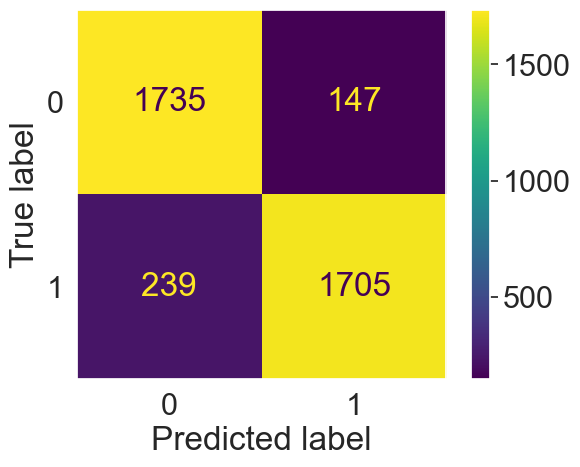

In [50]:
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

impute(imp_median, data)

### Iterative Imputation

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.7872451646628332
Recall: 0.8585390946502057
F1 Score: 0.8039499036608863
Precision: 0.7558876811594203
Confusion Matrix:


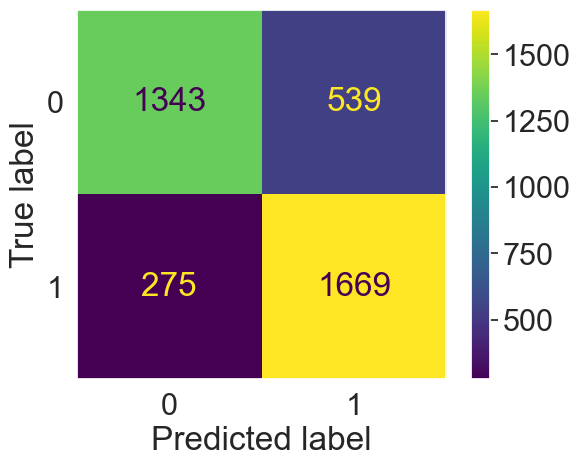



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.778881338212232
Recall: 0.8374485596707819
F1 Score: 0.7937591418820088
Precision: 0.7544022242817423
Confusion Matrix:


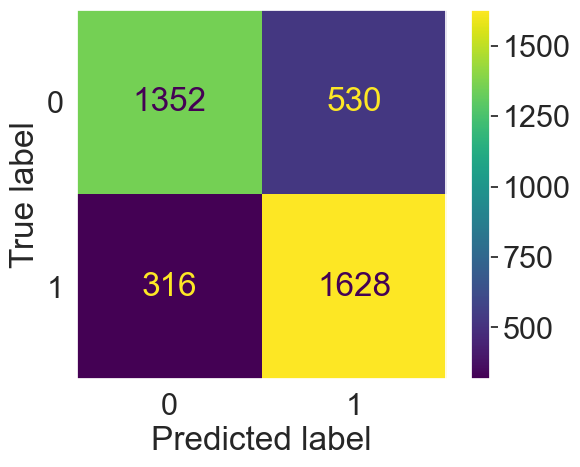



Decision tree:
Evaluation Metrics:
Accuracy: 0.8591217982226869
Recall: 0.8472222222222222
F1 Score: 0.8593790764414297
Precision: 0.8718898888300688
Confusion Matrix:


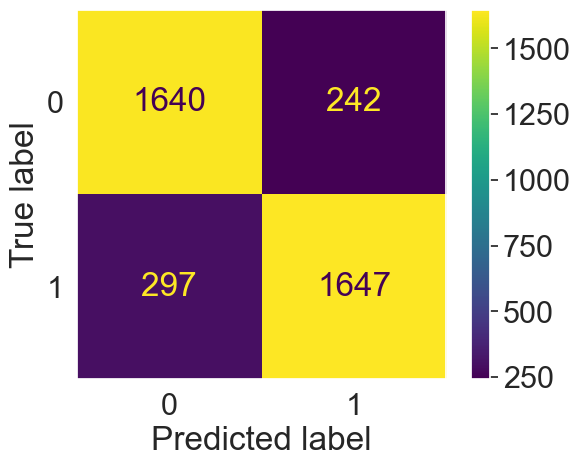



Random forest:
Evaluation Metrics:
Accuracy: 0.9153162571876634
Recall: 0.9017489711934157
F1 Score: 0.9154046997389034
Precision: 0.9294803817603393
Confusion Matrix:


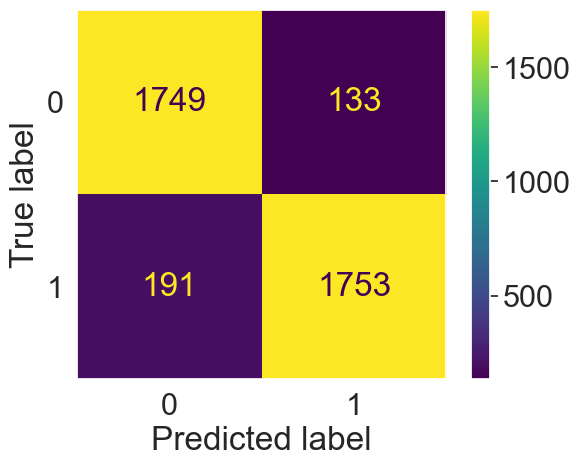

In [51]:
imp_iter = IterativeImputer(max_iter = 100, random_state = 42)

impute(imp_iter, data)

### K Nearest Neighbors Imputation

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.8282801881860952
Recall: 0.8595679012345679
F1 Score: 0.835708927231808
Precision: 0.8131386861313868
Confusion Matrix:


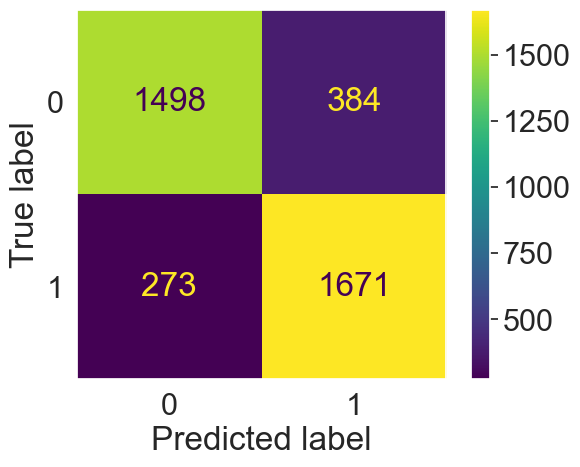



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.7613695765812859
Recall: 0.8240740740740741
F1 Score: 0.7782365800340053
Precision: 0.7372296364473079
Confusion Matrix:


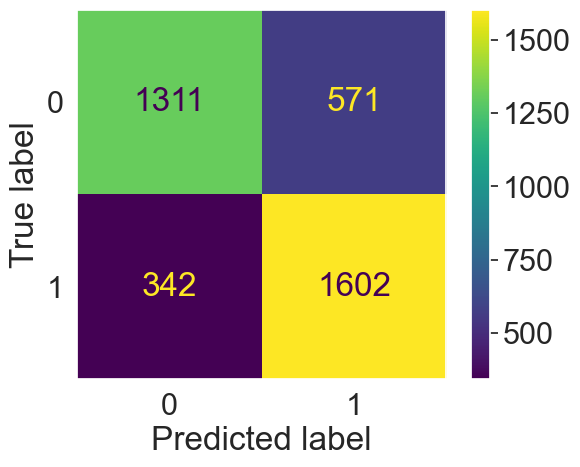



Decision tree:
Evaluation Metrics:
Accuracy: 0.8518034500784109
Recall: 0.8395061728395061
F1 Score: 0.8519968676585747
Precision: 0.8648648648648649
Confusion Matrix:


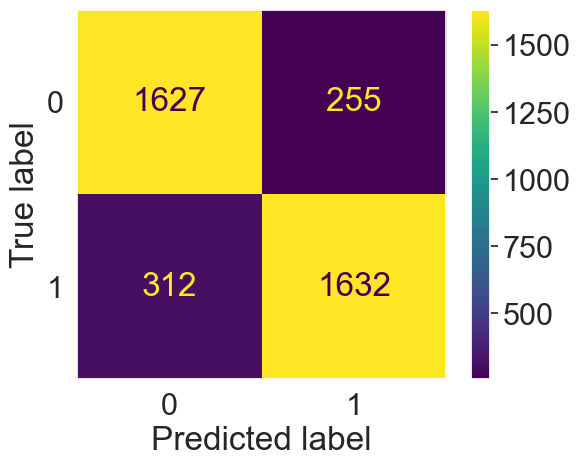



Random forest:
Evaluation Metrics:
Accuracy: 0.8891792995295348
Recall: 0.8667695473251029
F1 Score: 0.8882445967316817
Precision: 0.9108108108108108
Confusion Matrix:


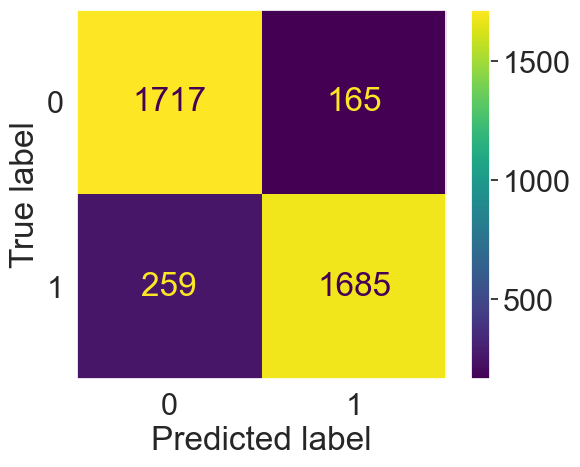

In [52]:
imp_knn = KNNImputer(n_neighbors = 5, weights = "uniform")

impute(imp_knn, data)

## Reursive Feature Elimination

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.9120838009726898
Recall: 0.9432197728790915
F1 Score: 0.923177508989866
Precision: 0.9039692701664532
Confusion Matrix:


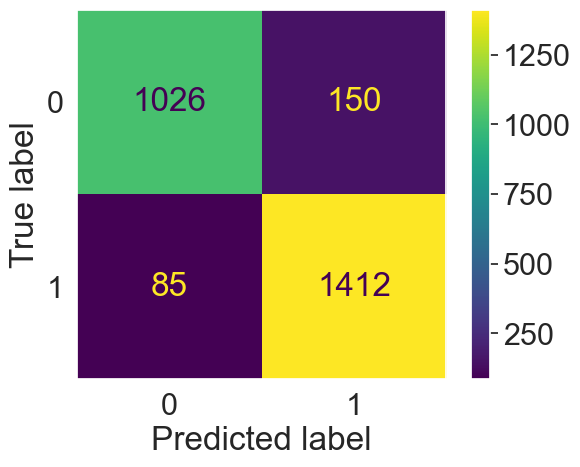



Decision Tree:
Evaluation Metrics:
Accuracy: 0.8978675645342312
Recall: 0.9084836339345357
F1 Score: 0.9087871700634814
Precision: 0.9090909090909091
Confusion Matrix:


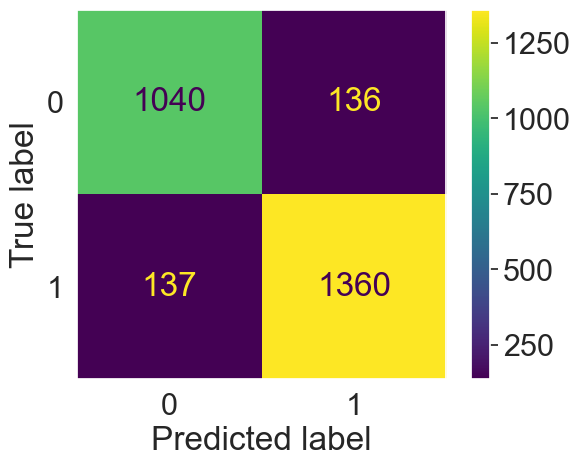



Random Forest:
Evaluation Metrics:
Accuracy: 0.9367751589973812
Recall: 0.9458917835671342
F1 Score: 0.9436854381872709
Precision: 0.9414893617021277
Confusion Matrix:


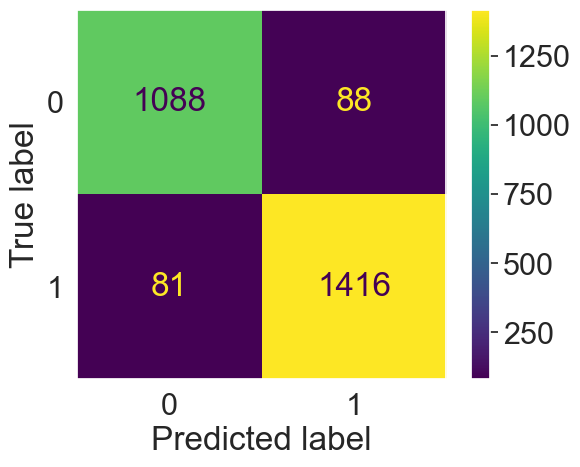

In [67]:
test_models_RFE(features, targets, 0.4, 25)

## Feature Importance

Random forest:
Evaluation Metrics:
Accuracy: 0.934156378600823
Recall: 0.948563794255177
F1 Score: 0.9416445623342174
Precision: 0.934825543120474
Confusion Matrix:


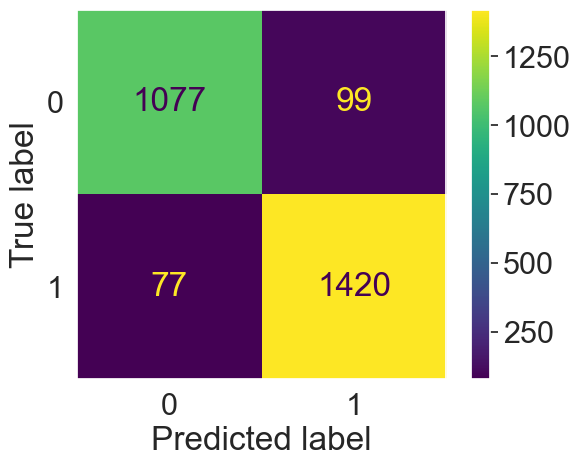

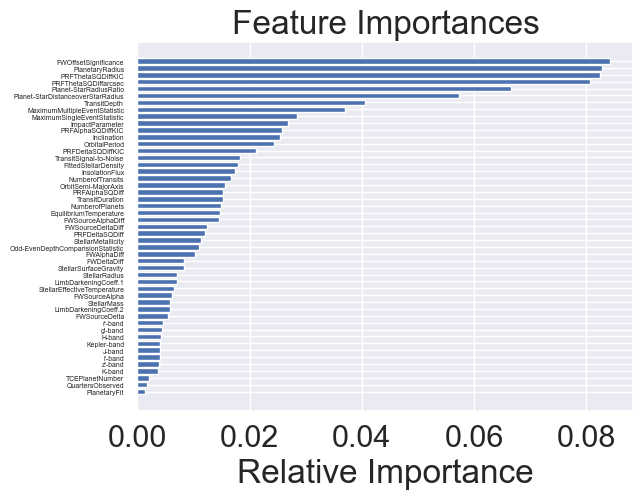

In [70]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(features, targets, random_state = 42, test_size = 0.4)
rand_forest_important(X_train_i, X_test_i, y_train_i, y_test_i, 5, 49)

## RFECV

Proportion of testing size: 0.4
Random Forest:
Optimal number of features: 36


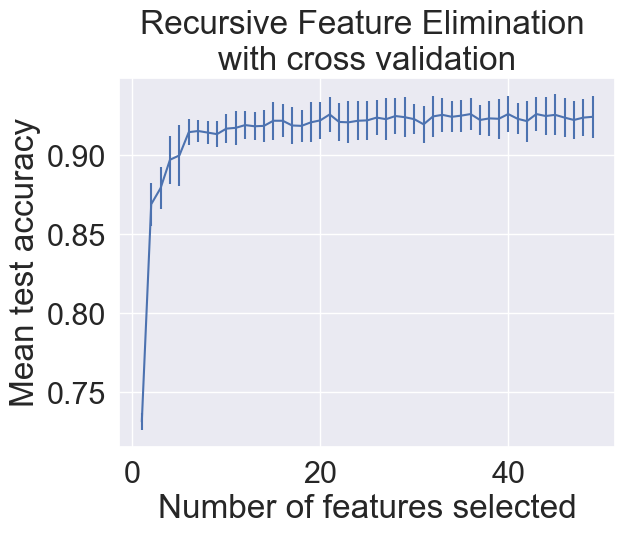

Evaluation Metrics:
Accuracy: 0.9349046015712682
Recall: 0.9472277889111557
F1 Score: 0.9421926910299003
Precision: 0.9372108393919365
Confusion Matrix:


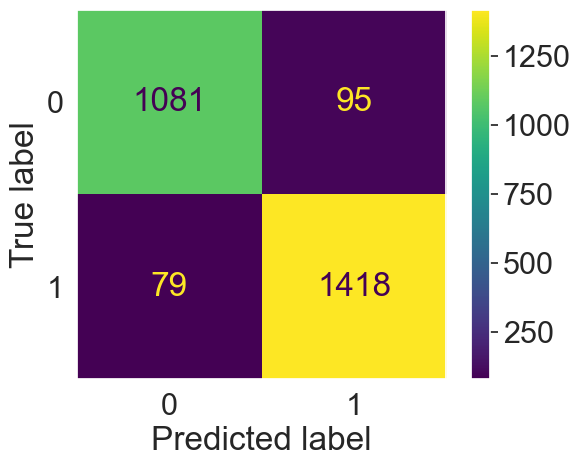

In [71]:
test_models_RFECV(features, targets, 0.4)